<a href="https://colab.research.google.com/github/Manish-Singh-Mehra/Kaggle-Projects/blob/main/Google_Collab/mnist_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(X_train, Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

In [3]:
X_test.shape

(10000, 28, 28)

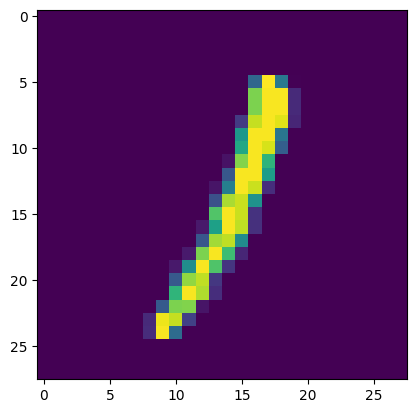

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[99])

In [5]:
X_train = X_train/255
X_test = X_test/255

In [6]:
model= Sequential()

In [7]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [10]:
history=model.fit(X_train, Y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 8s 4ms/step - loss: 0.2860 - accuracy: 0.9187 - val_loss: 0.1585 - val_accuracy: 0.9548
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1275 - accuracy: 0.9625 - val_loss: 0.1228 - val_accuracy: 0.9639
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0892 - accuracy: 0.9731 - val_loss: 0.0983 - val_accuracy: 0.9703
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0669 - accuracy: 0.9798 - val_loss: 0.1022 - val_accuracy: 0.9682
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0515 - accuracy: 0.9839 - val_loss: 0.0873 - val_accuracy: 0.9759
Epoch 6/20
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0413 - accuracy: 0.9877 - val_loss: 0.0843 - val_accuracy: 0.9749
Epoch 7/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0319 - accuracy: 0.9901 - val_loss: 0.0963 - val_accurac

In [11]:
Y_prob = model.predict(X_test)
Y_pred = Y_prob.argmax(axis=1)

313/313 [==============================] - 2s 4ms/step


In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.9764

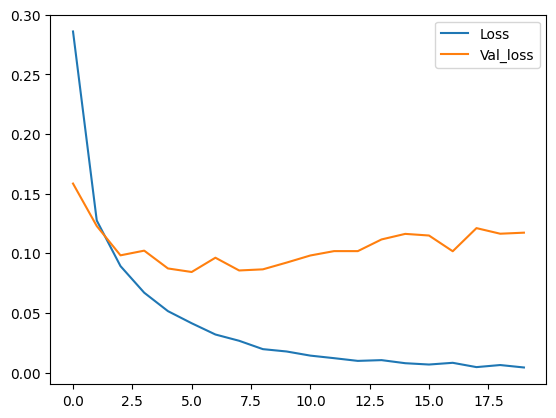

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss','Val_loss'])

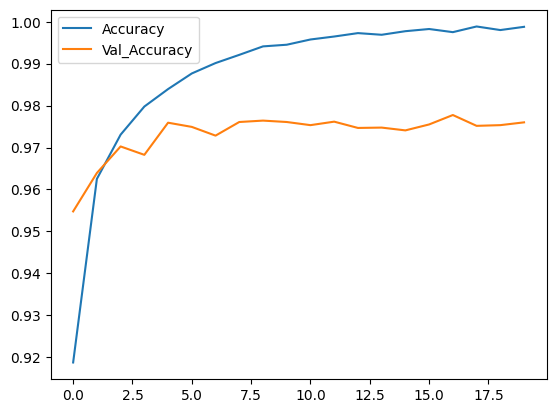

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy','Val_Accuracy'])